In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('clean_df.csv')
print(df.columns)
df.describe()
df.head()

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,41787,2,10.0,1,3.0,0,670,0,0,13,10,301,2,-1,0,1
1,40757,3,9.0,3,3.0,0,3444,0,0,10,8,252,1,185,2,1
2,36829,2,7.0,2,2.0,0,802,1,1,12,5,289,2,-1,0,1
3,44098,3,9.0,2,1.0,0,2795,0,0,8,7,480,1,181,2,1
4,22465,2,11.0,2,2.0,0,273,0,0,22,8,565,2,-1,0,1


In [17]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,2,10.0,1,3.0,0,670,0,0,13,10,301,2,-1,0,1
1,3,9.0,3,3.0,0,3444,0,0,10,8,252,1,185,2,1
2,2,7.0,2,2.0,0,802,1,1,12,5,289,2,-1,0,1
3,3,9.0,2,1.0,0,2795,0,0,8,7,480,1,181,2,1
4,2,11.0,2,2.0,0,273,0,0,22,8,565,2,-1,0,1


In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [23]:
type(df.columns)

pandas.core.indexes.base.Index

In [47]:
from sklearn.preprocessing import StandardScaler
features = ['housing', 'loan','month','pdays','marital']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,housing,loan,month,pdays,marital
0,-0.953600,-0.398572,1.496082,-0.488578,-1.266287
1,-0.953600,-0.398572,0.711381,1.205607,1.918208
2,1.048657,2.508955,-0.465672,-0.488578,0.325961
3,-0.953600,-0.398572,0.319030,1.169173,0.325961
4,-0.953600,-0.398572,0.711381,-0.488578,0.325961


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-1.685425,0.870627
1,-0.860428,-0.242042
2,1.143605,-2.268643
3,-0.481878,0.709129
4,-1.349618,0.057017


In [49]:
finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,y
0,-1.685425,0.870627,1
1,-0.860428,-0.242042,1
2,1.143605,-2.268643,1
3,-0.481878,0.709129,1
4,-1.349618,0.057017,1


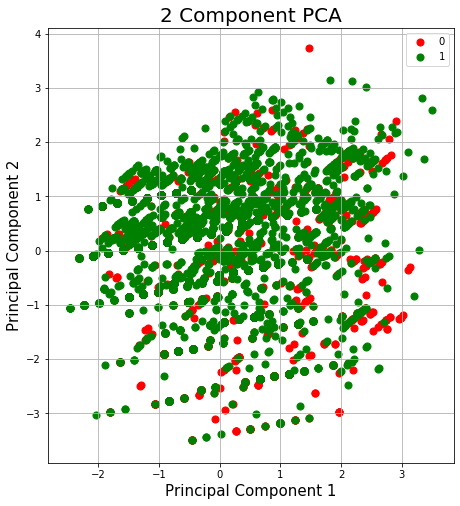

In [50]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [51]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.23497652 0.21833255]
0.4533090645569233


In [52]:
print(y.shape)
print(np.ravel(y).shape)

print(x.shape)

(9921, 1)
(9921,)
(9921, 5)


In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
lda_result = lda.fit_transform(x, np.ravel(y))

ldaDf = pd.DataFrame(data = lda_result
             , columns = ['Linear Discriminant 1', 'Linear Discriminant 2'])

In [56]:
finalLdaDf = pd.concat([ldaDf, df[['y']]], axis = 1)
finalLdaDf.head(5)

,Linear Discriminant 1,y
0,0.885079,1
1,1.239259,1
2,-2.073690,1
3,1.485540,1
4,0.568236,1


TypeError: scatter() missing 1 required positional argument: 'y'

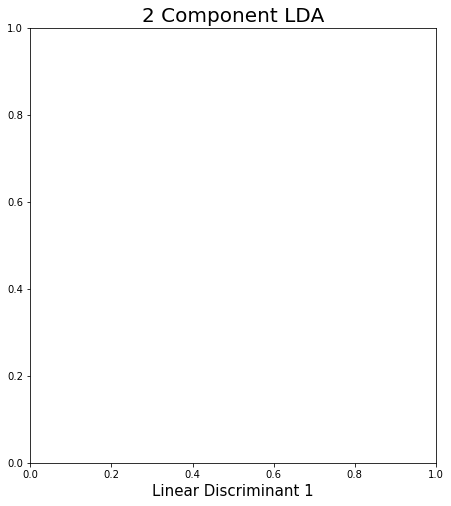

In [61]:
fig = plt.figure(figsize = (16,8))
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Linear Discriminant 1', fontsize = 15)
# ax2.set_ylabel('Linear Discriminant 2', fontsize = 15)

ax2.set_title('2 Component LDA', fontsize = 20)


targets = [0,1]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalLdaDf['y'] == target
    ax2.scatter(finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 1']
               , finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 2']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()

#Copy from the previous code
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [0,1]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

plt.show()